In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import seaborn as sns
from keras import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score

Using TensorFlow backend.
C:\Users\Krishna P\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Krishna P\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Krishna P\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Krishna P\Anaconda3\lib\site-packages\tensorflow\python\fra

In [2]:
df=pd.read_csv("C:\\Users\\Krishna P\\Documents\\Machine learning\\loan.txt")


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df=df.dropna()

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [6]:
df=df.drop('Loan_ID',axis=1)

In [7]:
type(df['LoanAmount'])

pandas.core.series.Series

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
Gender               480 non-null object
Married              480 non-null object
Dependents           480 non-null float64
Education            480 non-null object
Self_Employed        480 non-null object
ApplicantIncome      480 non-null int64
CoapplicantIncome    480 non-null float64
LoanAmount           480 non-null float64
Loan_Amount_Term     480 non-null float64
Credit_History       480 non-null float64
Property_Area        480 non-null object
Loan_Status          480 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 48.8+ KB


In [9]:
df['LoanAmount']=(df['LoanAmount']*1000).astype(int)

In [10]:
df['LoanAmount'].head()

1    128000
2     66000
3    120000
4    141000
5    267000
Name: LoanAmount, dtype: int32

In [11]:
Counter(df['Loan_Status'])

Counter({'N': 148, 'Y': 332})

In [12]:
pre_x=df.drop('Loan_Status',axis=1)
pre_y=df['Loan_Status']
dm_x=pd.get_dummies(pre_x)
dm_y=pre_y.map(dict(Y=1,N=0))

In [13]:
pre_x.shape

(480, 11)

In [14]:
(pre_y).shape

(480,)

In [15]:
dm_x.shape

(480, 17)

In [16]:
type(dm_x)

pandas.core.frame.DataFrame

In [17]:
pre_x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128000,360.0,1.0,Rural
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66000,360.0,1.0,Urban
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120000,360.0,1.0,Urban
4,Male,No,0.0,Graduate,No,6000,0.0,141000,360.0,1.0,Urban
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267000,360.0,1.0,Urban


In [28]:
pre_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 11 columns):
Gender               480 non-null object
Married              480 non-null object
Dependents           480 non-null float64
Education            480 non-null object
Self_Employed        480 non-null object
ApplicantIncome      480 non-null int64
CoapplicantIncome    480 non-null float64
LoanAmount           480 non-null int32
Loan_Amount_Term     480 non-null float64
Credit_History       480 non-null float64
Property_Area        480 non-null object
dtypes: float64(4), int32(1), int64(1), object(5)
memory usage: 43.1+ KB


In [29]:
dm_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 17 columns):
Dependents                 480 non-null float64
ApplicantIncome            480 non-null int64
CoapplicantIncome          480 non-null float64
LoanAmount                 480 non-null int32
Loan_Amount_Term           480 non-null float64
Credit_History             480 non-null float64
Gender_Female              480 non-null uint8
Gender_Male                480 non-null uint8
Married_No                 480 non-null uint8
Married_Yes                480 non-null uint8
Education_Graduate         480 non-null uint8
Education_Not Graduate     480 non-null uint8
Self_Employed_No           480 non-null uint8
Self_Employed_Yes          480 non-null uint8
Property_Area_Rural        480 non-null uint8
Property_Area_Semiurban    480 non-null uint8
Property_Area_Urban        480 non-null uint8
dtypes: float64(4), int32(1), int64(1), uint8(11)
memory usage: 29.5 KB


In [30]:
#Since the target variable is unbalanced ,Lets run the smote analysis

In [31]:
!{sys.executable} -m pip install imblearn

'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.


In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
smote=SMOTE()

In [34]:
X1,y=smote.fit_sample(dm_x,dm_y)

In [35]:
X1.shape

(664, 17)

In [36]:
y.shape

(664,)

In [37]:
dm_x.shape

(480, 17)

In [38]:
#we can see minority classes are bumped it up

In [39]:
ms=MinMaxScaler()

In [40]:
X=ms.fit_transform(X1)

In [41]:
type(X1)

pandas.core.frame.DataFrame

In [42]:
X1.shape

(664, 17)

In [43]:
X.shape

(664, 17)

In [44]:
type(X)

numpy.ndarray

In [45]:
Counter(y)

Counter({0: 332, 1: 332})

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [47]:
from keras.wrappers.scikit_learn import KerasClassifier

In [48]:
def create_model(optimizer='adam',

                 kernel_initializer='random_normal'):

    model = Sequential()

    model.add(Dense(200,activation='relu',kernel_initializer=kernel_initializer,input_dim=X_train.shape[1]))

    model.add(Dense(400,activation='relu',kernel_initializer=kernel_initializer))
    model.add(Dense(4,activation='relu',kernel_initializer=kernel_initializer))
    model.add(Dense(1,activation='sigmoid',kernel_initializer=kernel_initializer))
    
    model.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=['accuracy'])

    return model

In [161]:
clf=KerasClassifier(build_fn=create_model,batch_size=20,
    epochs=100,
    verbose=0)

In [162]:
clf.fit(X_train,y_train)

In [163]:
clf.score(X_test,y_test)

0.8345864415168762

AttributeError: 'KerasClassifier' object has no attribute 'predict_classes'

In [164]:
classifier=Sequential()
classifier.add(Dense(200,activation='relu', kernel_initializer='random_normal',input_dim=X_train.shape[1]))
classifier.add(Dense(400,activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(4,activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(1,activation='sigmoid', kernel_initializer='random_normal'))

In [165]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [173]:
classifier.fit(X_train,y_train,batch_size=20,
    epochs=100,
    verbose=0,)

In [174]:
eval_model=classifier.evaluate(X_train,y_train)

531/531 [==============================] - 0s 216us/step


In [175]:
eval_model

[0.1504151337480141, 0.9416195750236511]

In [176]:
classifier.predict_classes(X_test)

array([[1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
    

In [177]:
y_pred=classifier.predict(X_test)

In [178]:
y_pred

array([[9.5605075e-01],
       [0.0000000e+00],
       [6.9293553e-01],
       [8.6934650e-01],
       [9.9999505e-01],
       [8.8066077e-01],
       [8.9406967e-08],
       [5.6961304e-01],
       [0.0000000e+00],
       [1.8191656e-01],
       [9.5456314e-01],
       [8.5550320e-01],
       [8.4897876e-04],
       [9.4581968e-01],
       [9.5205605e-01],
       [2.3841858e-07],
       [4.5071512e-01],
       [0.0000000e+00],
       [8.1963992e-01],
       [9.9921298e-01],
       [9.4761133e-01],
       [9.9984097e-01],
       [9.2407978e-01],
       [8.0168641e-01],
       [0.0000000e+00],
       [9.6261418e-01],
       [0.0000000e+00],
       [0.0000000e+00],
       [9.6588045e-01],
       [9.9999386e-01],
       [4.1723251e-07],
       [0.0000000e+00],
       [1.7881393e-07],
       [8.6370218e-01],
       [6.8991816e-01],
       [2.7631819e-03],
       [6.4548922e-01],
       [2.9802322e-07],
       [9.9654961e-01],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.000000

In [49]:
y_pred=(y_pred>0.5)

In [50]:
cm=confusion_matrix(y_test,y_pred)

In [51]:
cm

array([[49, 16],
       [ 7, 61]], dtype=int64)

Text(33.0, 0.5, 'actual')

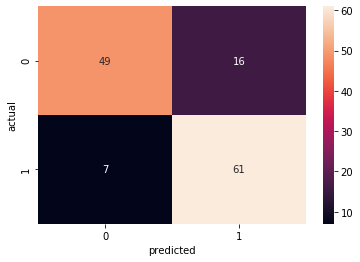

In [52]:
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
ax.set_xlabel('predicted')
ax.set_ylabel('actual')


In [53]:
classifier.score(X_test,y_test)

AttributeError: 'Sequential' object has no attribute 'score'

In [58]:
X_train.shape

(531, 17)

In [59]:
type(X_train)

numpy.ndarray

In [60]:
y_train.shape

(531,)

In [61]:
type(y_train)

pandas.core.series.Series

In [62]:
y_train1=np.array(y_train).ravel()

In [63]:
y_train1.shape

(531,)

In [64]:
type(y_train1)

numpy.ndarray

In [65]:
type(X_test)

numpy.ndarray

In [66]:
y_pred.shape

(133, 1)

In [67]:
X_test.shape

(133, 17)

In [68]:
y_test.shape

(133,)

In [69]:
type(y_test)

pandas.core.series.Series

In [70]:
import pickle
import joblib

In [71]:
from joblib import dump,load

In [72]:
joblib.dump(classifier,'loan_model.pkl')

['loan_model.pkl']

In [73]:
mdl=joblib.load('loan_model.pkl')